# Analytical work

Question 3: Produce the bifurcation plot for this system, that is, plot the value of the equilibria as a function of R0, with R0 taking values from 0.1 to 5.0. For this question, the value of N is irrelevant (provided it’s strictly positive) so use 1000 for example. This should be done using Python.

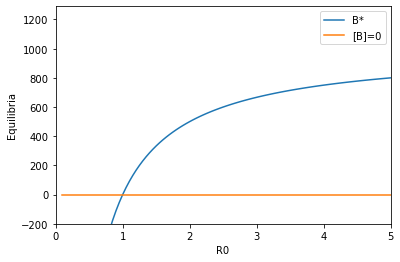

In [3]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0.1, 5, 99)
N = 1000

plt.plot(r, N*(1-1/r), label="B*") #plotting B* against R0
plt.plot(r, np.zeros_like(r), label="[B]=0") #Plotting my zero equilibria against R0
plt.xlabel("R0")
plt.ylabel("Equilibria")
plt.legend(loc = 'best')
plt.xlim(0, 5)
plt.ylim(bottom= -200)
plt.show()

#Looks like pitchfork bifurication 

5) Using different values of B0 (between 1 and N – briefly discuss the case B0 = 0), plot solutions of B(t) for various values of R0 between 0.1 and 5.0 (with γ= 0.5 for example). Confirm your expression for B(t) is correct by (a) verifying that it converges to B∗ for large times t and (b) visually confirming agreement when integrating the mean-field equation using Euler (use Python). What happenswhen R0 = 1? Speculate as to what this means. We will get back to this. For a given value of R0, what happens when the value of γ changes? Provide a brief explanation.


<ipython-input-4-3382661b5293>:14: RuntimeWarning: divide by zero encountered in reciprocal
  B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1 #my solution from question 4
<ipython-input-4-3382661b5293>:14: RuntimeWarning: invalid value encountered in multiply
  B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1 #my solution from question 4


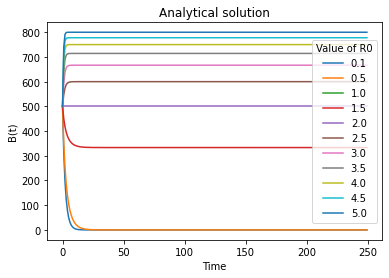

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Setting up values
R0 = np.array([0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
t = np.arange(250)
N = 1000
gamma = 0.5
B0 = 500
            
for i in R0: #for different values of R0
    B_star = N*(1-1/i) #Setup of values that rely on R0 in thier definition 
    beta = gamma*i
    B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1 #my solution from question 4
    plt.plot(t,B, label=i) #Plotting this solution agaisnt time

plt.xlabel("Time")
plt.ylabel("B(t)")
plt.legend(title = 'Value of R0',loc='best')
plt.title('Analytical solution')
plt.show()

When B0=0, this causes the whole equation for Bt to be 0 and no individual is able to move from state B to state A, meaning that B stays at 0 for all R0 values even over large periods of time. I will discuss how this fits in with my real-life example when i come to the critical thinking section. 

I can tell that my expression is correct becauase it converges to my non-zero fixed point B* when R0 is more than 1.

When R0=1 we can see that all lines converge to the non-zero fixed point B*. From looking at the bifurication plot in the question above, we can see that this fixed point emerges at R0=1. Therefore, any R0 that fall at 1 or less will tend to the other fixed point (N,0). Again, I will discuss why this is the case in the real-life example in the critical thinking section. 

<ipython-input-5-47d45183081f>:14: RuntimeWarning: divide by zero encountered in reciprocal
  B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1
<ipython-input-5-47d45183081f>:14: RuntimeWarning: invalid value encountered in multiply
  B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1


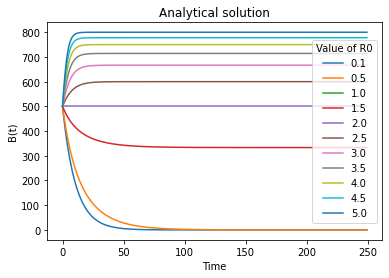

In [5]:
import numpy as np
import matplotlib.pyplot as plt


R0 = np.array([0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
t = np.arange(250)
N = 1000
gamma = 0.1 #Changing the value of gamma to be small, rest of code is as above 
B0 = 500
            
for i in R0:
    B_star = N*(1-1/i)
    beta = gamma*i
    B = B_star*(1-(1-B_star/B0)*np.exp(-beta*B_star/N*t))**-1
    plt.plot(t,B, label=i)

plt.xlabel("Time")
plt.ylabel("B(t)")
plt.legend(title = 'Value of R0',loc='best')
plt.title('Analytical solution')
plt.show()

You can above that the smaller the value of gamma, the longer the lines take to converge to their fixed points. This is because a smaller gamma value leads to a smaller beta value, a smaller beta value in our B(t) expression will slow convergence. I predict that the opposite would be the case if the value of gamma were to be increased, but this would be less clear to see graphically.  

In [6]:
def myfunc(B, beta, gamma, N):
    dbdt = (beta * B/N * (N-B) - gamma * B) #my mean field equation as per question 1
    return dbdt

In [7]:
#setting up values
def PlotEuler(beta, gamma):
    h=0.1
    t=np.arange(0,250+h,h)
    b=np.zeros((len(t),1))
    b[0]=500
    
    for i in np.arange(len(t)-1):
        b[i+1]= b[i] + h * myfunc(b[i], beta, gamma, N=1000) #using the Euler code as per lab class 4
        
    R0= beta/gamma
    
    plt.plot(t,b, label=i)
    plt.xlabel("Time")
    plt.ylabel("B(t)")
    plt.title("Euler's solution")
    plt.legend(['0.1', '0.5', '1.0','1.5','2.0', '2.5', '3.0', '3.5','4.0', '4.5','5.0'], loc='best', title='Value of R0')

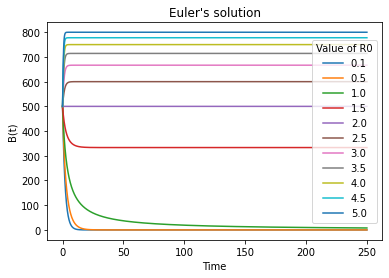

In [8]:
beta= [0.05,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5]
gamma= 0.5

for i in beta:
    PlotEuler(i, gamma) #plotting the same R0 values as analytical solution graphs to allow for comparison 

The Euler solution seems to have very good agreement with my anlytical solution, with the exception of R0=1 where it takes much longer to converge to the zero fixed point. 

For the simulation question answers please see python notebook 'simulation work'